In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
import pydotplus
import graphviz
from sklearn import tree
from sklearn import tree

In [6]:
df = pd.read_excel(r"C:\Users\yahia\Downloads\Sparks 6.xlsx")

# Preview of Data


In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df = df.drop('Id',axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### As shown there is no missing data in our data set 
#### All data types are right


In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Create a bar chart of species distribution
print(df['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


# Data visouliztion 


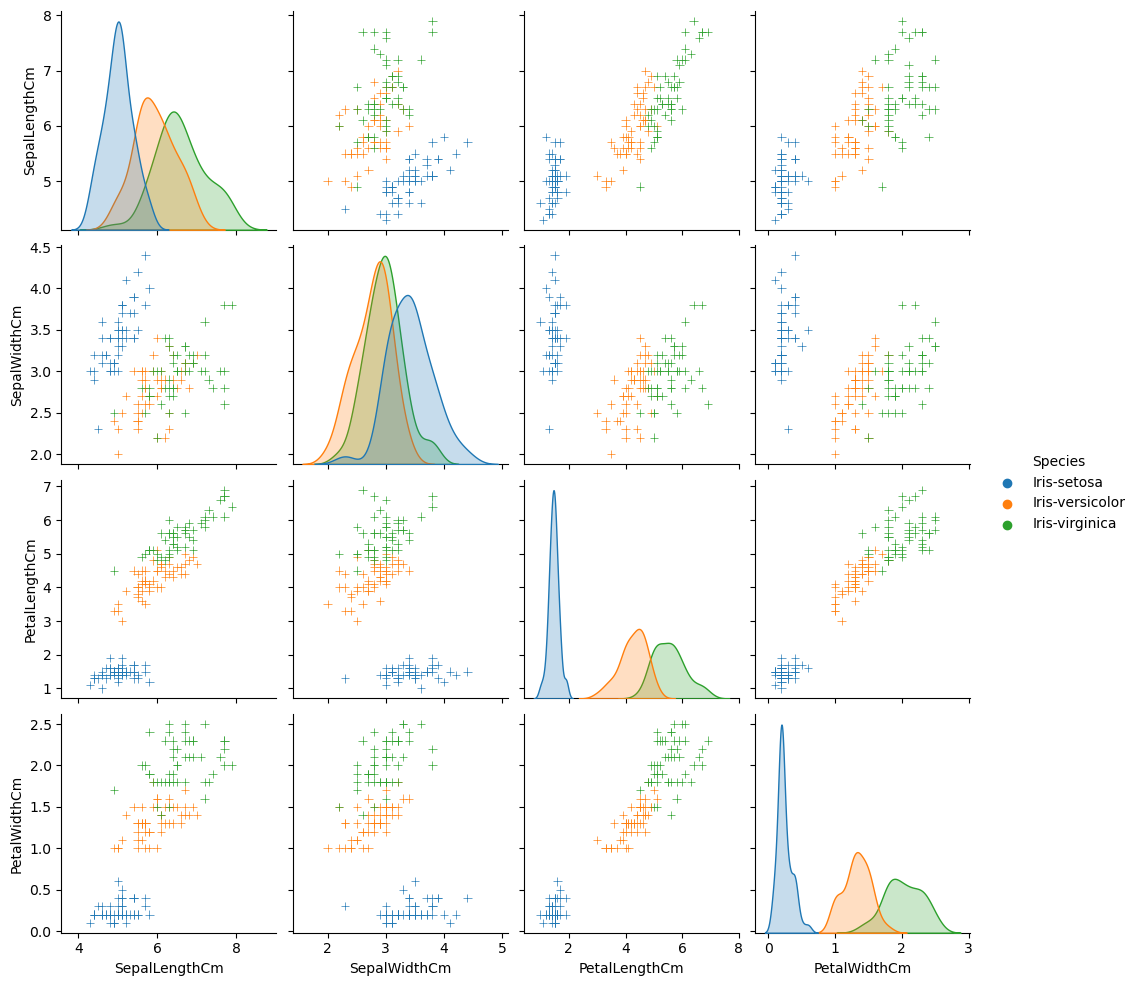

In [12]:
g = sns.pairplot(df, hue='Species', markers='+')
plt.show()

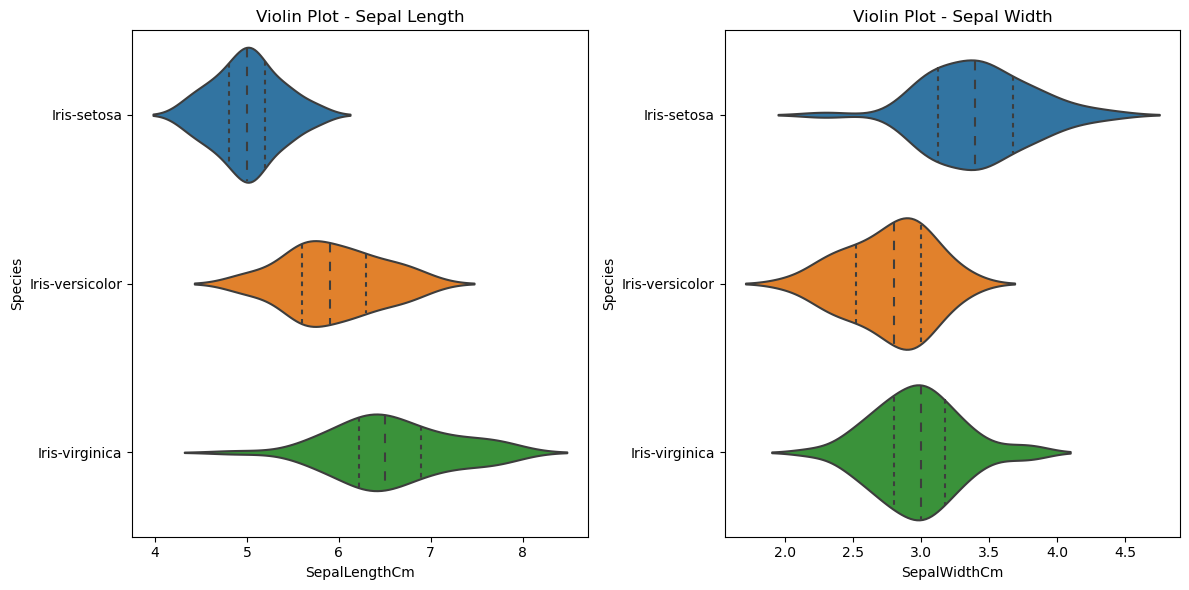

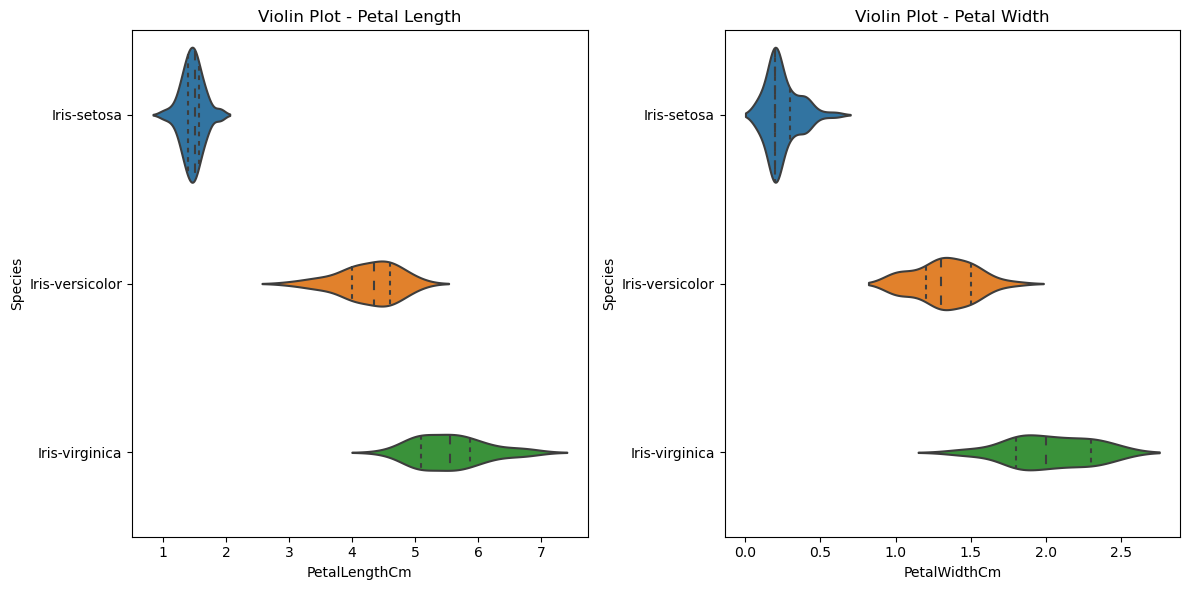

In [13]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
# First subplot: SepalLengthCm and SepalWidthCm
plt.subplot(1, 2, 1)
g = sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.title('Violin Plot - Sepal Length')
plt.subplot(1, 2, 2)
g = sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.title('Violin Plot - Sepal Width')
plt.tight_layout()  # Adjust the spacing between subplots if necessary
plt.show()
# Second subplot: PetalLengthCm and PetalWidthCm
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)
g = sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.title('Violin Plot - Petal Length')
plt.subplot(1, 2, 2)
g = sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.title('Violin Plot - Petal Width')
plt.tight_layout()  # Adjust the spacing between subplots if necessary
plt.show()


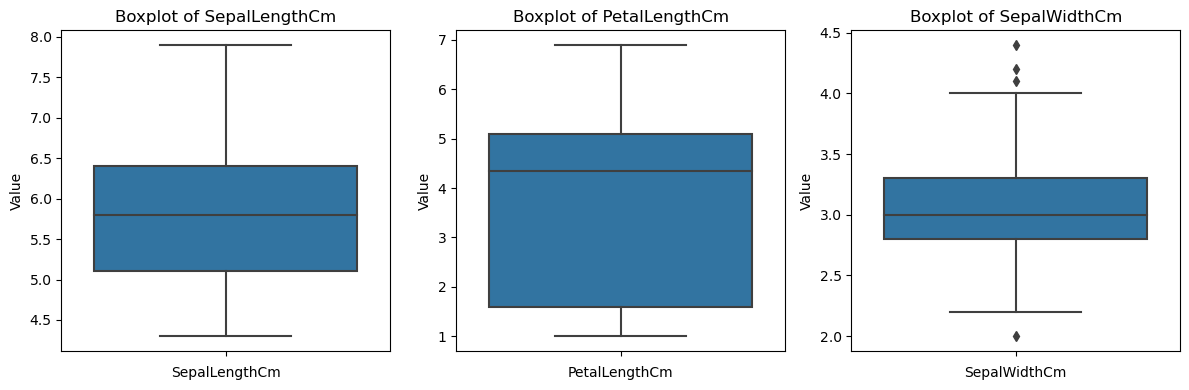

In [14]:
features = ['SepalLengthCm', 'PetalLengthCm', 'SepalWidthCm']

plt.figure(figsize=(12, 4))  # Adjust the figure size as needed

for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, y=feature)
    plt.xlabel(feature)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()  # Adjust the spacing between subplots if necessary
plt.show()

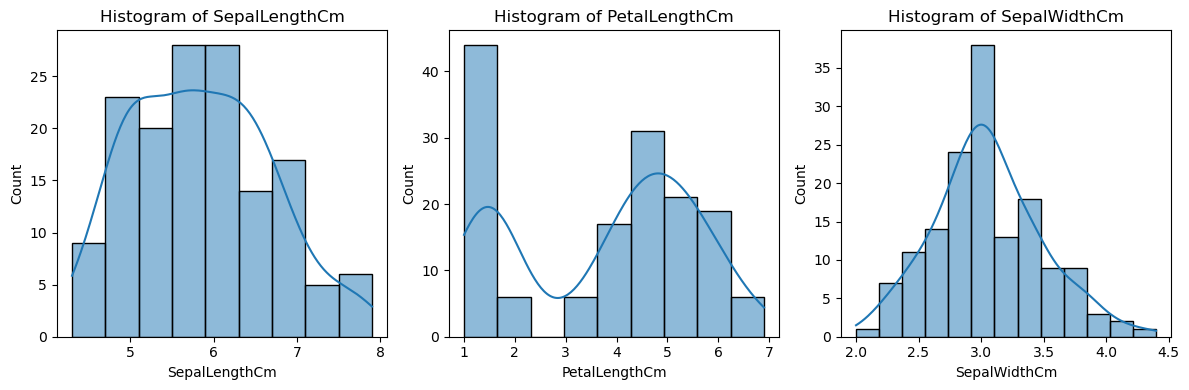

In [15]:
features = ['SepalLengthCm', 'PetalLengthCm', 'SepalWidthCm']

plt.figure(figsize=(12, 4))  # Adjust the figure size as needed

for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')

plt.tight_layout()  # Adjust the spacing between subplots if necessary
plt.show()

C:\Users\yahia\AppData\Local\Temp\ipykernel_14244\548423044.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


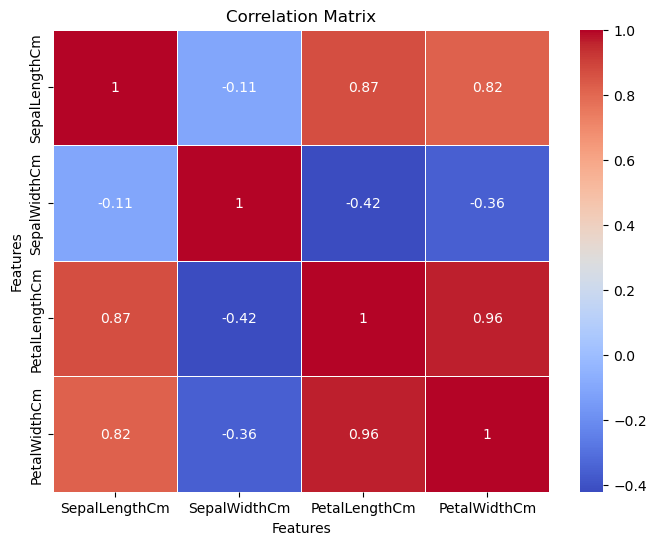

In [16]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Matrix')

plt.show()

# The model


In [33]:
X = df.drop('Species', axis=1)  # Features
y_1 = df['Species']  # Target variable

In [34]:
# Encode the target variable into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_1)

In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Create a Decision Tree classifier
model = DecisionTreeClassifier()

In [37]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [39]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


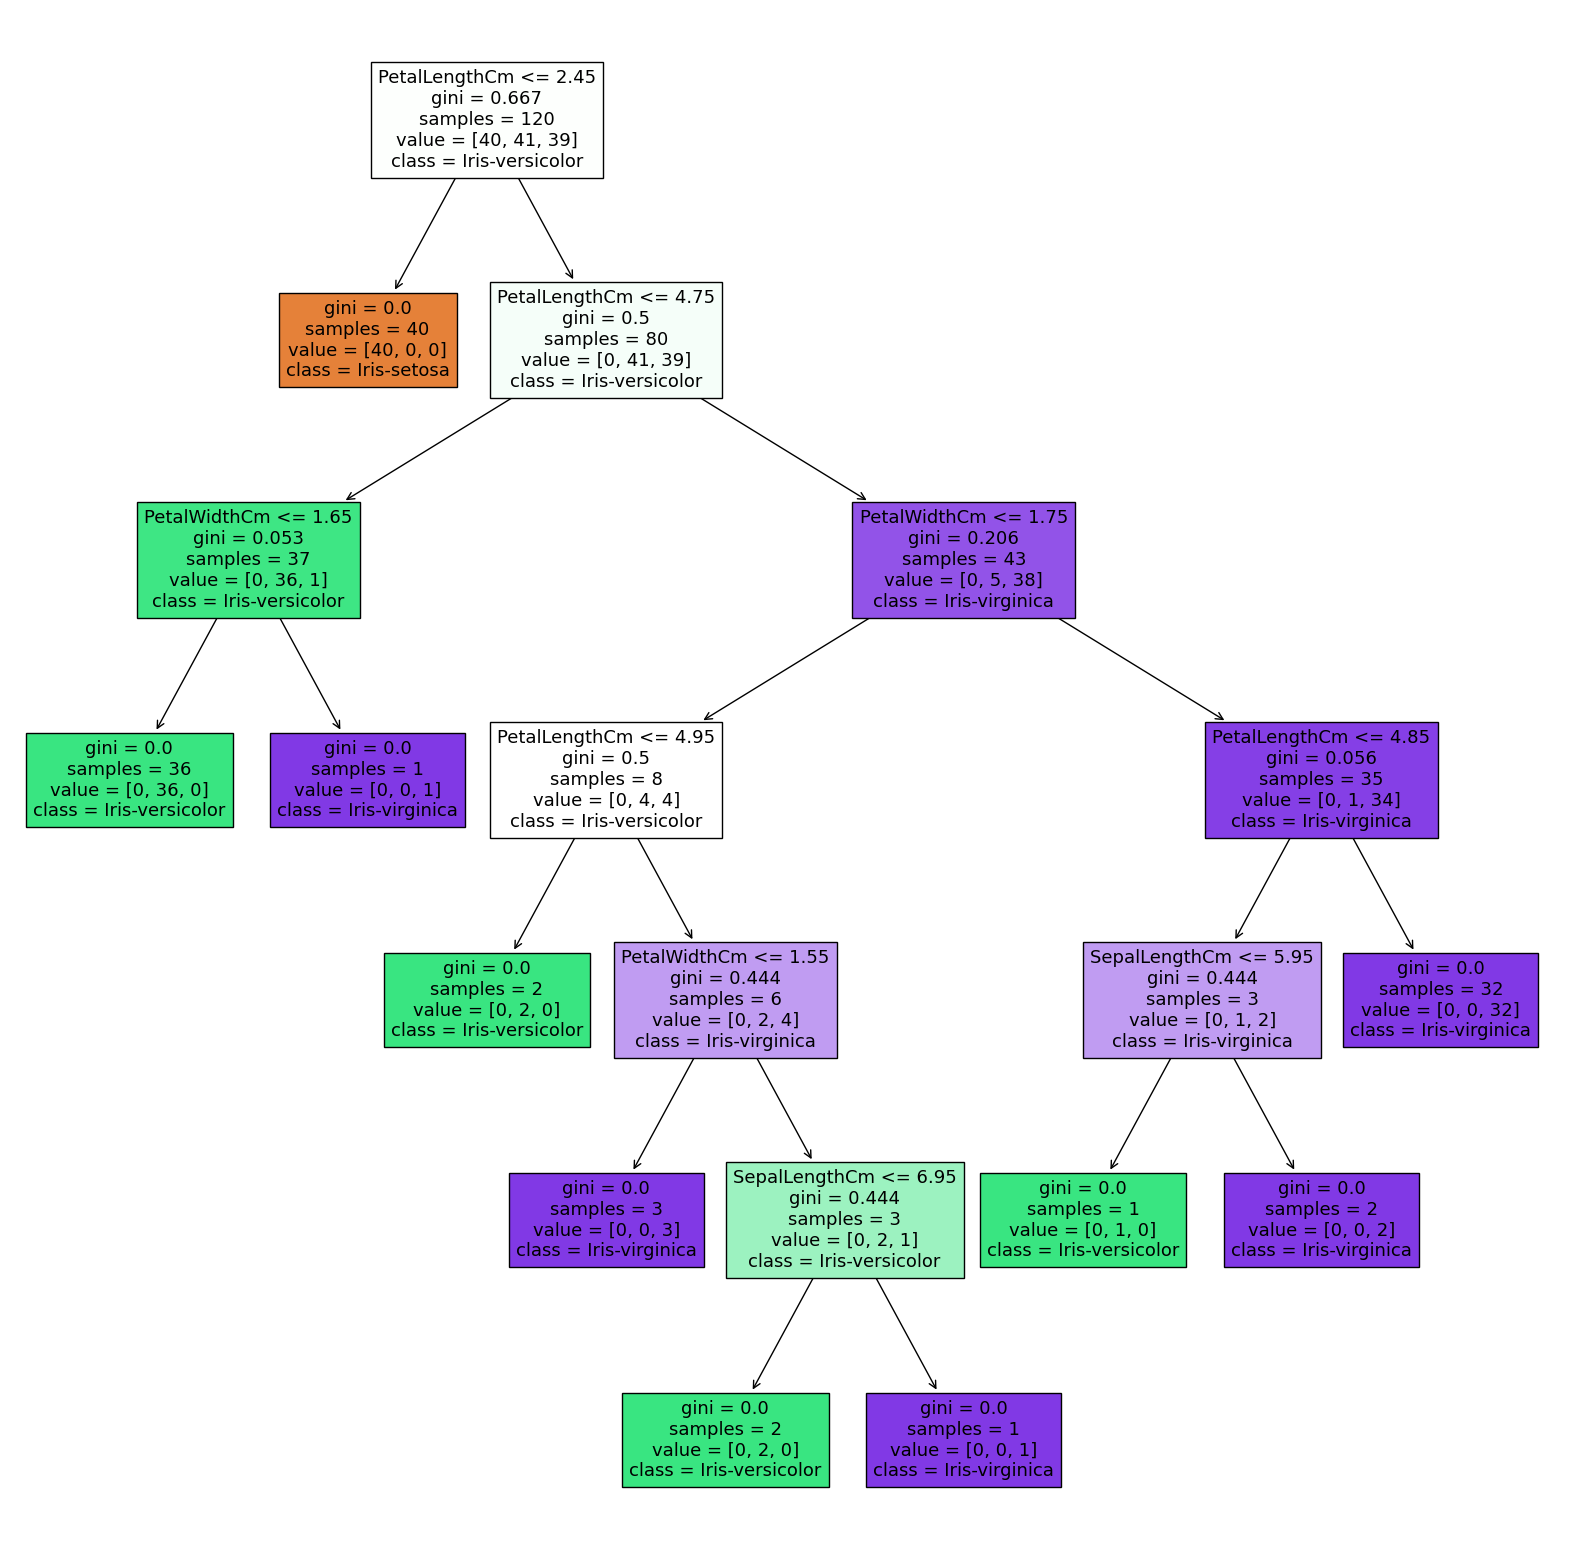

In [55]:

plt.figure(figsize=(20, 20))  # Adjust the parentheses and specify the figsize
tree.plot_tree(model, feature_names=X.columns, class_names=y_1.unique(), filled=True)
plt.show()  # Display the plot
